In [1]:
import pandas as pd

df = pd.read_csv('iris.csv')

df.info()
df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [2]:
counts = df['Species'].value_counts()
print(counts)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


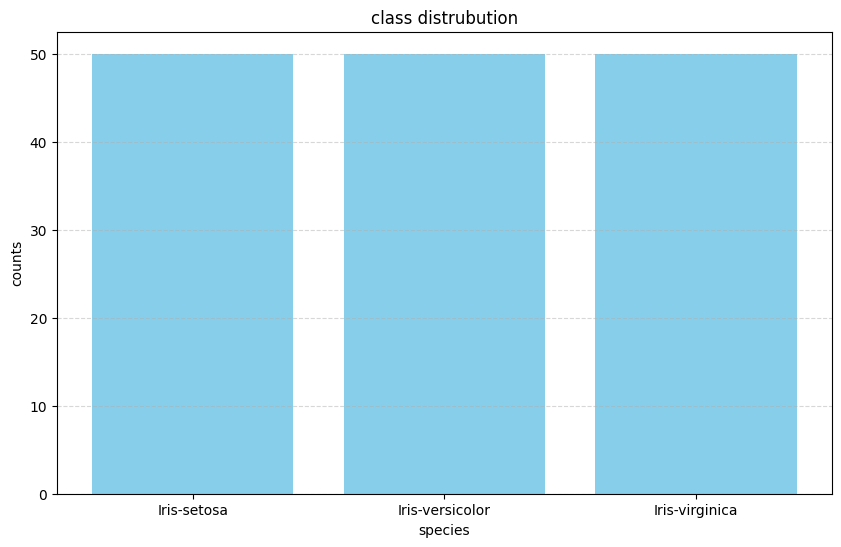

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(counts.index,counts,color='skyblue')
plt.xlabel("species")
plt.ylabel("counts")
plt.title("class distrubution")
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.savefig('hell.svg' ,format='svg')
plt.show()

In [4]:
#constructing boxplot
plt.figure(figsize=(8,4))
sns.boxplot(df,x='Species',y='SepalLengthCm')
plt.title("sepal length by species")
plt.grid(True)
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x400 with 0 Axes>

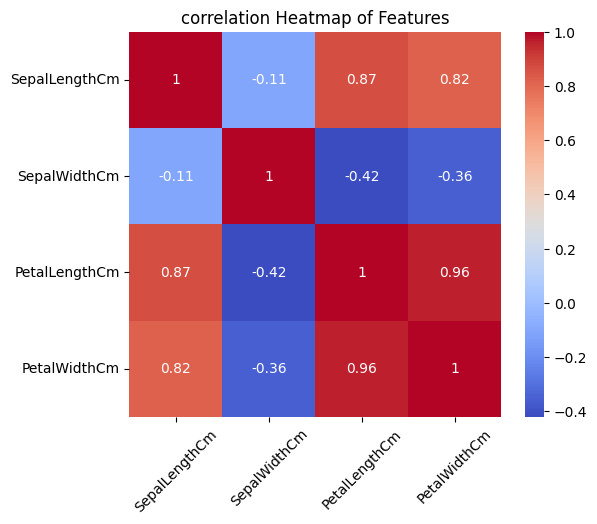

In [ ]:
#constructing heatmap

plt.figure(figsize=(6,5))
plt.xticks(rotation=45)
sns.heatmap(df.drop(columns=['Species']).corr(),annot=True,cmap='coolwarm')
plt.title("correlation Heatmap of Features")
plt.show()

In [ ]:

X = df.drop(columns=['Species'])
y = df["Species"]




,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
83,6.0,2.7,5.1,1.6


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier



knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train,y_train)

knn_preds = knn_model.predict(X_test)



In [ ]:
from sklearn.metrics import accuracy_score,classification_report

print("Accuracy=",accuracy_score(y_test,knn_preds)*100)




Accuracy= 96.66666666666667


In [ ]:
print(classification_report(y_test,knn_preds))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



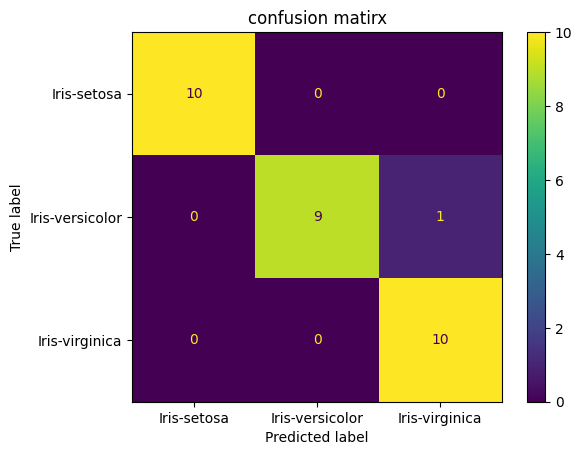

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,knn_preds)

cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=y.unique())
cm_plot.plot()
plt.title("confusion matirx")
plt.show()


In [17]:
import joblib
joblib.dump(knn_model,'knn_model.pkl')
print("sucess")


sucess


In [22]:
 X.sample()



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
141,6.9,3.1,5.1,2.3


In [23]:
knn_preds = knn_model.predict(X.sample())
print(knn_preds)

['Iris-setosa']
